* Python pour le calcul scientique
# Formation Doctorale D2
Chapitre 1 : La base

# Exercice 1.1 : Fonction de moyenne

In [4]:
def calcul_moyenne(donnees: list[float]) -> float:
  

    return sum(donnees) / len(donnees)

**Le Retourne la fonction si la liste est [1.0, 2.0, 3.0]**

In [5]:
calcul_moyenne([1.0, 2.0, 3.0])

2.0

**Le résultat pour une liste est vide**

# Exercice 1.2 : Gestion d’une liste vide

* La fonction suivante retourne et affiche **None** 

In [6]:
def calcul_moyenne(donnees: list[float]) -> float | None:
   
    if len(donnees) == 0:
        print( 'None')
        return None
        
    return sum(donnees) / len(donnees)

In [7]:
calcul_moyenne([])

None


In [9]:
def calcul_moyenne(donnees: list[float]) -> float | None:
   
    if not donnees:
        return None
        
    return sum(donnees) / len(donnees)

In [10]:
print(calcul_moyenne([]) )

None


# Exercice 1.3 : Analyse de données génomiques

In [11]:
def gene_plus_exprime(expressions: dict[str, int]) -> str | None:

    if not expressions:
        return None
        
    gene_max = None
    expression_max = float('-inf')
    
    for gene, niveau_gene in expressions.items():
        if niveau_gene > expression_max:
            gene_max = gene
            expression_max = niveau_gene
            
    return gene_max

**Test**

In [12]:
donnees = {"BRCA1": 5200, "TP53": 3400, "EGFR": 4100}
resultat = gene_plus_exprime(donnees)
print(resultat)

BRCA1


# Exercice 1.6 : Création de tenseurs de base

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tensorflow as tf

tensor_tf = tf.constant([[1, 2],
                         [3, 4]])

print(tensor_tf.shape)

(2, 2)


In [15]:
import torch

tensor_pt = torch.tensor([[1, 2],
                          [3, 4]])


print(tensor_pt.shape)

torch.Size([2, 2])


# Exercice 1.7 : Opérations tensoriels de base# 

In [22]:
import torch

# Création des tenseurs 3x3
a = torch.tensor([[1, 2, 3],
                  [1, 0, 1],
                  [9, 8, 7]], dtype=torch.float32)

b = torch.tensor([[2, 1, 3],
                  [6, 5, 4],
                  [3, 8, 1]], dtype=torch.float32)

# 1. Addition élément par élément
addition = a + b

# 2. Multiplication matricielle
matmul = torch.matmul(a, b)

# 3. Produit élément-wise (Hadamard)
hadamard = a * b

# Affichage des résultats
print("Tenseur a:\n", a)
print("\nTenseur b:\n", b)
print("\nAddition élément par élément:\n", addition)
print("\nMultiplication matricielle:\n", matmul)
print("\nProduit Hadamard:\n", hadamard)

Tenseur a:
 tensor([[1., 2., 3.],
        [1., 0., 1.],
        [9., 8., 7.]])

Tenseur b:
 tensor([[2., 1., 3.],
        [6., 5., 4.],
        [3., 8., 1.]])

Addition élément par élément:
 tensor([[ 3.,  3.,  6.],
        [ 7.,  5.,  5.],
        [12., 16.,  8.]])

Multiplication matricielle:
 tensor([[ 23.,  35.,  14.],
        [  5.,   9.,   4.],
        [ 87., 105.,  66.]])

Produit Hadamard:
 tensor([[ 2.,  2.,  9.],
        [ 6.,  0.,  4.],
        [27., 64.,  7.]])


Opération

* Addition élément-wise :		a + b	[a11+b11, a12+b12, ...]
* Multiplication matrice: 	a @ b	Produit ligne × colonne
* Produit Hadamard:		a * b	[a11*b11, a12*b12, ...]


# Prob 4 : Compression d’image par SVD

Applique la décomposition en valeurs singulières :

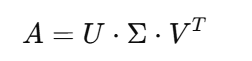

SVD décompose la matrice d'image A en trois matrices :


* U: Vecteurs singuliers gauche (forme: m × r)
* S: Valeurs singulières (diagonale, forme: r)
* Vt: Vecteurs singuliers droit transposés (forme: r × n)


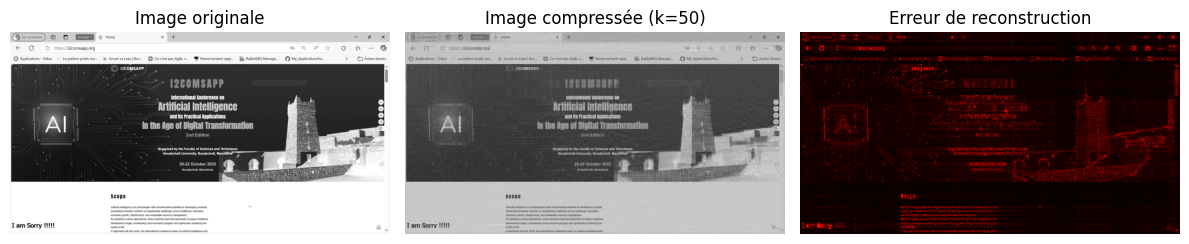

Taux de compression: 13.3x
Économie: 92.5% d'espace


In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

# 1. Lecture et affichage de l'image originale
img = Image.open("/kaggle/input/i2comp/Capture.JPG").convert("L") 
A = np.array(img, dtype=np.float32)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='gray')
plt.title("Image originale")
plt.axis('off')

# 2. Décomposition SVD
U, S, Vt = svd(A, full_matrices=False)
k = 50  # Nombre de valeurs singulières à conserver

# Reconstruction avec k composantes Exmeple 1
A_comp = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

# 3. Affichage de l'image compressée et de l'erreur
plt.subplot(1, 3, 2)
plt.imshow(A_comp, cmap='gray')
plt.title(f"Image compressée (k={k})")
plt.axis('off')



plt.subplot(1, 3, 3)
plt.imshow(np.abs(A - A_comp), cmap='hot')
plt.title("Erreur de reconstruction")
plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Calcul du taux de compression
taille_originale = A.size
taille_compressée = k * (1 + U.shape[0] + Vt.shape[1])
taux_compression = taille_originale / taille_compressée

print(f"Taux de compression: {taux_compression:.1f}x")
print(f"Économie: {100*(1 - 1/taux_compression):.1f}% d'espace")

**Compression d'image par SVD avec composantes (APC)**

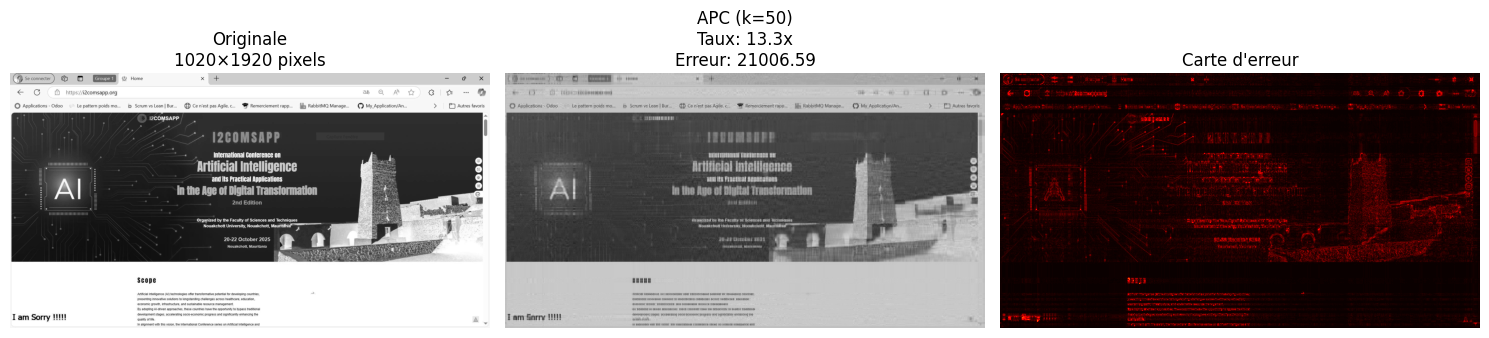

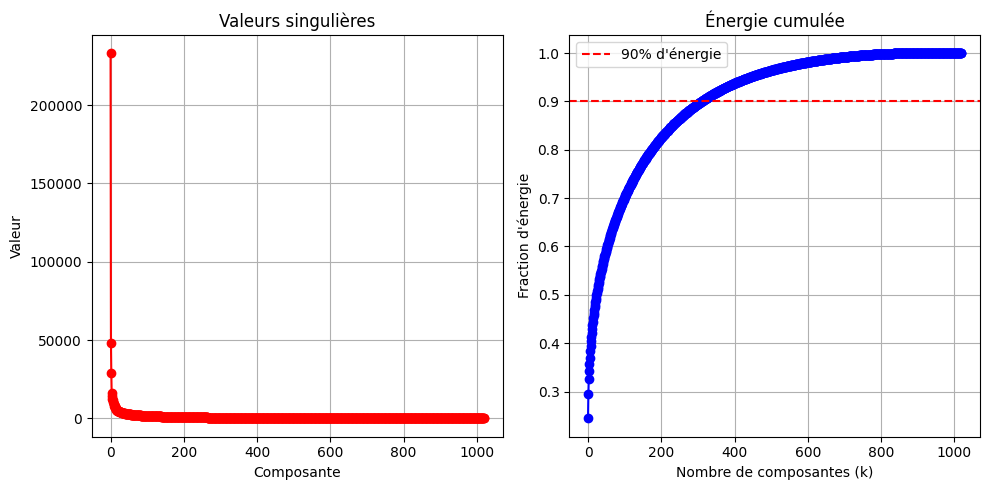

In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

# 1. Chargement de l'image
img = Image.open("/kaggle/input/i2comp/Capture.JPG").convert("L")  # Conversion en niveaux de gris
A = np.array(img, dtype=np.float32)

# 2. Décomposition SVD
U, S, Vt = svd(A, full_matrices=False)

# 3. Choix du nombre de composantes (k)
k = 50  # Nombre de composantes principales à conserver

# 4. Reconstruction par APC
# Création de la matrice diagonale Σ avec seulement les k premières valeurs
Sigma_k = np.zeros((U.shape[1], Vt.shape[0]))
Sigma_k[:k, :k] = np.diag(S[:k])

# Reconstruction de l'image
A_apc = U @ Sigma_k @ Vt

# 5. Calcul de l'erreur
erreur = np.linalg.norm(A - A_apc, 'fro')  # Norme de Frobenius

# 6. Calcul du taux de compression
m, n = A.shape
taille_originale = m * n
taille_apc = k * (m + n + 1)  # U: m×k, Vt: k×n, S: k valeurs
taux_compression = taille_originale / taille_apc

# 7. Affichage des résultats
plt.figure(figsize=(15, 5))

# Image originale
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='gray')
plt.title(f"Originale\n{m}×{n} pixels")
plt.axis('off')

# Image compressée par APC!
plt.subplot(1, 3, 2)
plt.imshow(A_apc, cmap='gray')
plt.title(f"APC (k={k})\nTaux: {taux_compression:.1f}x\nErreur: {erreur:.2f}")
plt.axis('off')

# Carte d'erreur
plt.subplot(1, 3, 3)
plt.imshow(np.abs(A - A_apc), cmap='hot')
plt.title("Carte d'erreur")
plt.axis('off')

plt.tight_layout()
plt.show()

# 8. Visualisation de l'importance des composantes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(S, 'ro-')
plt.title("Valeurs singulières")
plt.xlabel("Composante")
plt.ylabel("Valeur")
plt.grid(True)

plt.subplot(1, 2, 2)
energie_cumulee = np.cumsum(S) / np.sum(S)
plt.plot(energie_cumulee, 'bo-')
plt.title("Énergie cumulée")
plt.xlabel("Nombre de composantes (k)")
plt.ylabel("Fraction d'énergie")
plt.axhline(y=0.9, color='r', linestyle='--', label='90% d\'énergie')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()